#  Data Scaling

In [ ]:
#KNN
-distance based

features(columns) - same scaled huna parxa

In [2]:
import pandas as pd

In [4]:
data = pd.read_csv("Diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
X = data[['Glucose','Age']]
y= data.Outcome

In [6]:
X

,Glucose,Age
0,148,50
1,85,31
2,183,32
3,89,21
4,137,33
...,...,...
764,122,27
765,121,30
766,126,47
767,93,23


In [ ]:
(85,31) #as a coordinate(glucose,age) 


In [7]:
X.describe() # age ra glucose ko range farak farak xa auta ko thulo range xa arko ko sano range xa so thulo range vako value re sano range vako value lai dominate garxa
#yesto case ma scaling garera duita ko range same banauna parxa like distance based, neural network jasto ma yesto garna parxa

,Glucose,Age
count,769.000000,769.000000
mean,120.897269,33.269181
std,31.951886,11.778737
min,0.000000,21.000000
25%,99.000000,24.000000
50%,117.000000,29.000000
75%,140.000000,41.000000
max,199.000000,81.000000


#min max  scaler
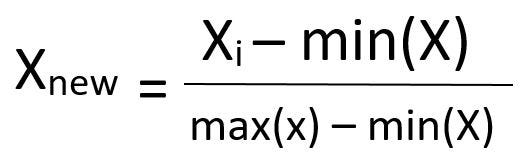

#Standard scaler
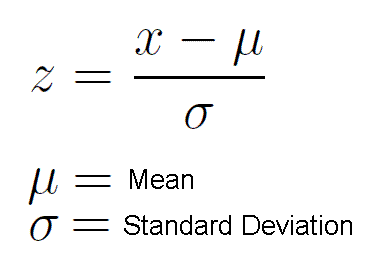

# Robust Scaling



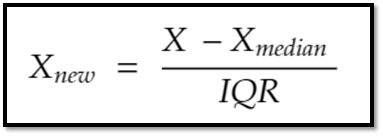

In [9]:
#from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler yesari use garna milxa
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split

In [ ]:
#suru mai scaling garne haina yo task garne paila
Steps: 
1.split data
2.train_data(fit_transform)
3.test_data(transform)

In [11]:
xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size = 0.2, random_state = 14)

In [12]:
xtrain.head()

,Glucose,Age
220,177,21
721,114,21
507,130,21
554,84,28
754,154,45


In [13]:
scaler = StandardScaler()
xtrain_s = scaler.fit_transform(xtrain)

xtest_s = scaler.transform(xtest)

In [14]:
xtrain_s

array([[ 1.69443415, -1.04452782],
       [-0.22990783, -1.04452782],
       [ 0.25881394, -1.04452782],
       ...,
       [-0.59644916, -1.04452782],
       [-0.81026494,  2.01849814],
       [-0.07718228, -0.78927566]], shape=(615, 2))

In [17]:
#xtrain, xtest lai pheri data frame banauna xa bhane yestp garne mathi numpy arraye banexa
xtrains = pd.DataFrame(xtrain_s, columns = xtrain.columns)
xtrains.head()

,Glucose,Age
0,1.694434,-1.044528
1,-0.229908,-1.044528
2,0.258814,-1.044528
3,-1.146261,-0.448939
4,0.991897,0.997489


In [15]:
from sklearn.neighbors import KNeighborsClassifier

In [16]:
knn = KNeighborsClassifier(n_neighbors = 7) # scaling vaisakeko training data dine
knn.fit(xtrain_s,ytrain)

KNeighborsClassifier(n_neighbors=7)

In [ ]:
yprediction = knn.predict(xtest_s)

# Decision Tree

In [ ]:
jasko child xaina leaf node bhanxa
jasko chlild node xa tesko internal node bhanxa
classification ra regression ma pani tree ko help le model build garna milxa
linearly seperable: line le seperate garna sakinxa kinai 
linearly seperable ma matra logistic le kaan garna sakinxa 
decision tree le linearly seperable data navaye ni classify garna sakxa kaam garxa

leaf ma decision hunxa yes or no


In [20]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [22]:
data = sns.load_dataset('iris')
data.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [24]:
X = data.drop('species', axis = 1)
y = data.species

In [26]:
xtrain,xtest, ytrain, ytest = train_test_split(X,y, test_size = 0.2, random_state = 11)

In [27]:
#decision tree ko model banaune
dmodel = DecisionTreeClassifier()
dmodel.fit(xtrain, ytrain)

DecisionTreeClassifier()

In [30]:
dmodel.predict([[4,3.1,1,0.5]])#[sepal_length,sepal_width ,petal_length ,petal_width]


C:\Users\admin\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['setosa'], dtype=object)

In [31]:
yprediction = dmodel.predict(xtest)

In [32]:
accuracy = accuracy_score(ytest, yprediction)
print(f'Accuracy:{accuracy:.2%}')

Accuracy:93.33%


In [34]:
from sklearn.tree import plot_tree # baneko tree herna lai
import matplotlib.pyplot as plt

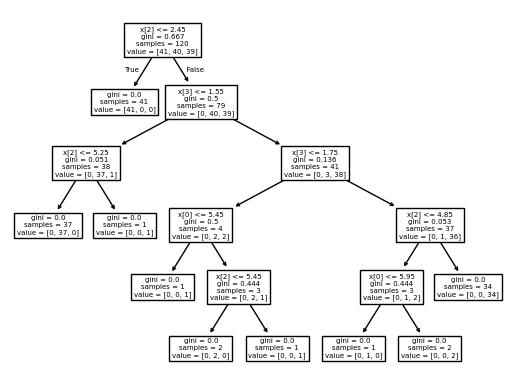

In [35]:
plot_tree(dmodel)
plt.show() # readable vayena tree label pani diyena tesko lagi pass garna parxa column ko name

In [ ]:
#leaf node le label ie class (y) dina parne ho so tyo kura banayera pass garna paryo

In [38]:
#target class ko value haru y ma xa
clas = y.unique()
clas
#clas = data['species'].unique(

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [40]:
feature = X.columns
feature

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')

In [ ]:
#leaf ma class ko label dina parne ho hamro label setosa, versicolor , verginika etc ho tyo pani ayena tree ma

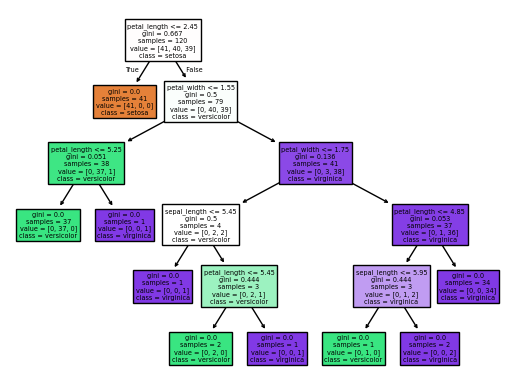

In [42]:
plot_tree(dmodel, feature_names = feature, class_names = clas,filled = True) #filled le color ako ho tree ma
plt.show()

In [ ]:
#left side true ho tree o right side false ho
#decion tree powerful xa logistic vanda
#decision tree cito overfitting hunxa yesko disadvantage ho